In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
folder = 'linear air'
file = 'linear air.csv'

In [0]:
folder = 'tread'
file = 'tread.csv'

In [0]:
folder = 'tyre sidewall cracking'
file = 'tyre sidewall cracking.csv'

In [0]:
path = Path(base_dir + 'data/tyre')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:

path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/tyre/normal'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tyre/tyre bulges'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tyre/tyre sidewall cracking'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tyre/models'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tyre/cleaned.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tyre/exposed'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tyre/tread'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tyre/linear air')]

In [0]:
classes = ['normal','tyre bulges','tyre sidewall cracking','exposed','tread','linear air']

In [0]:
download_images('/content/gdrive/My Drive/fastai-v3/tread wear indicator', dest, max_pics=200)

In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#download_images(path/file, dest, max_pics=20, max_workers=0)

In [0]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:


data.classes

['exposed',
 'linear air',
 'normal',
 'tread',
 'tyre bulges',
 'tyre sidewall cracking']

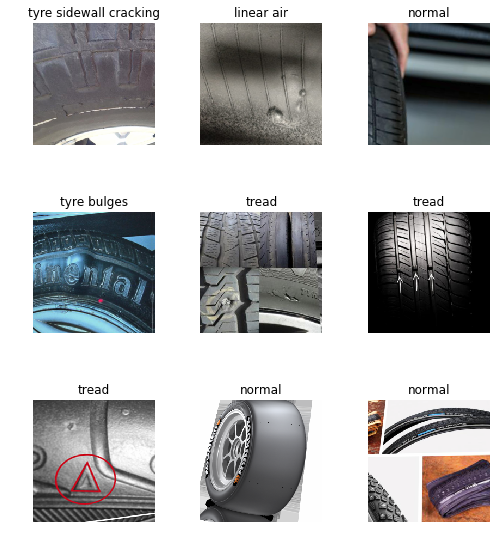

In [0]:

data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['exposed',
  'linear air',
  'normal',
  'tread',
  'tyre bulges',
  'tyre sidewall cracking'],
 6,
 416,
 104)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, ps = 0.5)

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.073303,1.252348,0.490385,00:07
1,1.555806,0.893967,0.269231,00:07
2,1.274789,0.866762,0.240385,00:07
3,1.099661,0.874560,0.250000,00:07
4,0.957582,0.875190,0.250000,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


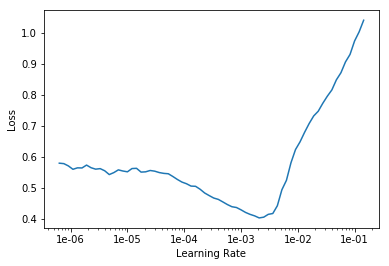

In [0]:

learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,9e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.102755,0.933723,0.192308,00:08
1,0.075988,0.911201,0.201923,00:08


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

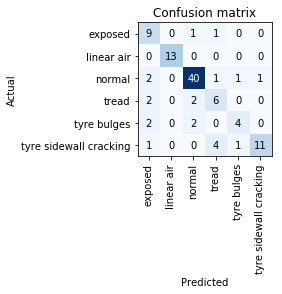

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

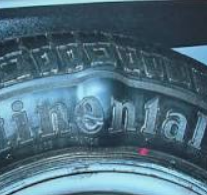

In [0]:
img = open_image('/content/gdrive/My Drive/fastai-v3/data/test/tyre bulges/b6.PNG')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tyre bulges